# **Robot world 1-D**
First, imagine you have a robot living in a 1-D world. You can think of a 1D world as a one-lane road. We can treat this road as an array, and break it up into grid cells for a robot to understand. In this case, the road is a 1D grid with 5 different spaces.(length of the array is 5) The robot can only move forwards or backwards. If the robot falls off the grid, it will loop back around to the other side (this is known as a cyclic world).

## Uniform distribution
The robot has a map so that it knows there are only 5 spaces in this 1D world. However, it hasn't sensed anything or moved. For a length of 5 cells (a list of 5 values), what is the probability distribution, p, that the robot is in any one of these locations?

Since the robot does not know where it is at first, the probability of being in any space is the same! This is a probability distribution and so the sum of all these probabilities should be equal to 1, so 1/5 spaces = 0.2. A distribution in which all the probabilities are the same (and we have maximum uncertainty) is called a uniform distribution.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# uniform distribution for 5 grid cells
# we use "p" to represent probability
p = [0.2, 0.2, 0.2, 0.2, 0.2]
print(p)

[0.2, 0.2, 0.2, 0.2, 0.2]


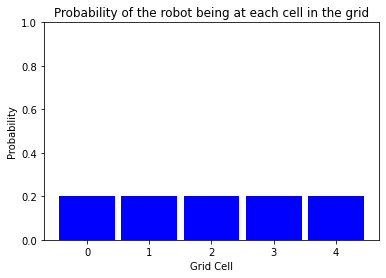

In [ ]:
def display_map(grid, bar_width=1):
    if(len(grid) > 0):
        x_labels = range(len(grid))
        plt.bar(x_labels, height=grid, width=bar_width, color='b')
        plt.xlabel('Grid Cell')
        plt.ylabel('Probability')
        plt.ylim(0, 1) # range of 0-1 for probability values 
        plt.title('Probability of the robot being at each cell in the grid')
        plt.xticks(np.arange(min(x_labels), max(x_labels)+1, 1))
        plt.show()
    else:
        print('Grid is empty')

# call function on grid, p, from before
display_map(p, 0.9)

In [ ]:
def initialize_robot(grid_length):
    ''' Takes in a grid length and returns 
       a uniform distribution of location probabilities'''
    p = []
    # create a list that has the value of 1/grid_length for each cell
    for i in range(grid_length):
        p.append(1.0/grid_length)
    return p

[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]


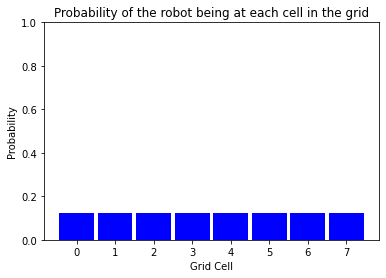

In [ ]:
p = initialize_robot(8)
print(p)
display_map(p,0.9)

# **Robot sensors**

Let's assume that 1D world is made of colored grid cells; all cells were either green or red (Here, cell-0, cell-3, cell-4 are green and cell-1, cell-2 are red). The robot then sensed that it was in a red grid cell.

## Probability after sense
Let's say that,
* The probability that it is sensing the correct color is `pHit` = 0.6
* The probability that it is sensing the incorrect color (in this case: seeing red but actually in a green cell) is `pMiss` = 0.2

[0.04000000000000001, 0.12, 0.12, 0.04000000000000001, 0.04000000000000001]


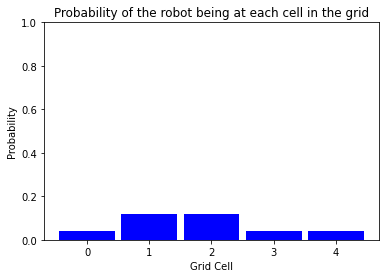

In [ ]:
p = initialize_robot(5)
pHit = 0.6
pMiss = 0.2

# create new grid, with modified probabilities after sensing
p = [p[i]*pHit if (i == 1 or i == 2) else p[i]*pMiss for i in range(len(p))]
print(p)
display_map(p,0.9)

In [ ]:
sum = np.sum(p)
print(sum)

0.3600000000000001


In [ ]:
p = np.divide(p, np.sum(p))
print(p)

[0.11111111 0.33333333 0.33333333 0.11111111 0.11111111]


## Sense function

In [ ]:
def sense(p, Z):
    p = [p[i]*pHit if (world[i] == Z) else p[i]*pMiss for i in range(len(world))]
    # p = [p[i] * ((Z == world[i])*pHit + (1 - (Z == world[i]))*pMiss) for i in range(len(p))]
    p = np.true_divide(p, np.sum(p))
    return p

q [0.27272727 0.09090909 0.09090909 0.27272727 0.27272727]
sum  1.0


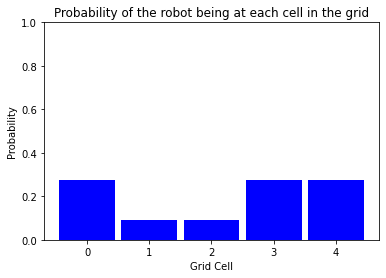

In [ ]:
p = initialize_robot(5)
world = ['green', 'red', 'red', 'green', 'green']
Z = 'green'
pHit = 0.6
pMiss = 0.2

q = sense(p, Z)
print('q', q)
print('sum ', np.sum(q))
display_map(q, 0.9)

### Multiple measurements

In [ ]:
measurements = ['red', 'green']
q = np.copy(p)
for i in range(len(measurements)):
    q = sense(q, measurements[i])
print('q', q)

q [0.2 0.2 0.2 0.2 0.2]


### Move function

In [92]:
def move(p, U):
    q=[]
    # iterate through all values in p
    for i in range(len(p)):
        # use the modulo operator to find the new location for a p value
        # this finds an index that is shifted by the correct amount
        index = (i-U) % len(p)
        nextIndex = (index+1) % len(p)
        prevIndex = (index-1) % len(p)
        s = pExact * p[index]
        s = s + pOvershoot  * p[nextIndex]
        s = s + pUndershoot * p[prevIndex]
        # append the correct, modified value of p to q
        q.append(s)
    return q

In [103]:
q = [0, 1, 0, 0, 0]
pExact = 0.8
pOvershoot = 0.1
pUndershoot = 0.1

for i in range(0,1000):
    q = move(q,1)
print(q)

[0.20000000000000365, 0.20000000000000373, 0.20000000000000365, 0.2000000000000035, 0.2000000000000035]


### Sense and motion

[0.23298926424051514, 0.2344203529005175, 0.09433486222486373, 0.15476529160700478, 0.28349022902709897]


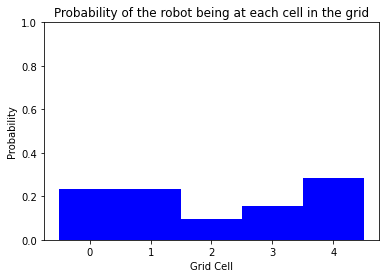

In [105]:
motions = [1,1]
for i in range(len(measurements)):
    p = sense(p, measurements[i])
    p = move(p,motions[i])
print(p)
display_map(p)

## Entropy
* *Entropy* : Measurement of the amount of uncertainty
* The update step increases uncertainty, hence entropy should increase. 
*The measurement step decreases uncertainty, so entropy should decrease.

Formula:
> $Entropy$ = $-\sum(p \times log(p))$



## Localization summary
* First, a robot starts out with some certainty/uncertainty about its position in a world, which is represented by an initial probability distribution, often called the ***initial belief*** or the ***prior***. Then it cycles through sensor measurements and movements.

Sense-Move Cycle

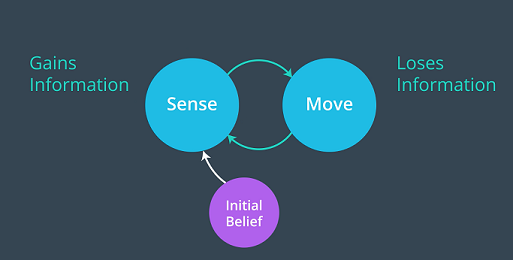

1. When a robot senses, a ***measurement update*** happens; this is a simple multiplication that is based off of Bayes' rule, which says that we can update our belief based on measurements! This step was also followed by a ***normalization*** that made sure the resultant distribution was still vald (and added up to 1).
2. When it moves, a ***motion update*** or prediction step occurs; this step is a convolution that shifts the distribution in the direction of motion.
After this cycle, we are left with an altered ***posterior*** distribution!



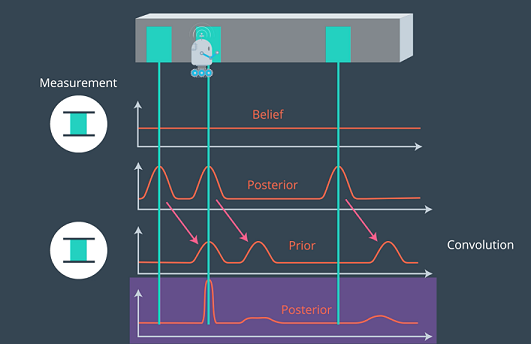